# Machine Learning e Imágenes en Python

## Actividad 3

### Mejora de Imagen e Histograma

Cargar en la notebook utilizando la librería OpenCV una imagen de manera monocroma y luego:

* Oscurecer la imagen y almacenarla en otra nueva variable.
* Aclarar la imagen y almacenarla en otra nueva variable.
* Aumentar el contraste de la imagen utilizando la ecualización del histograma.
* Mostrar los 4 histogramas de la imagen y aplicar brevemente la naturaleza de cada uno.

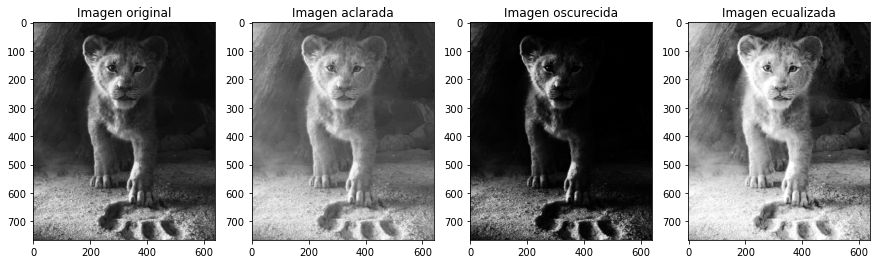

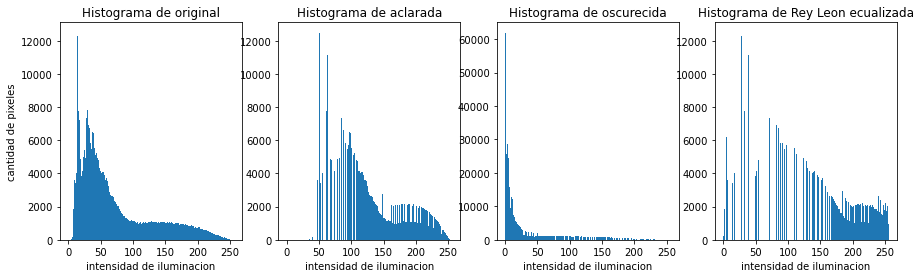

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('reyleon.jpg', cv2.IMREAD_GRAYSCALE)

#se modifica la imagen con la función gamma.
def ajuste_gamma(imagen,gamma):
    imagenresultado=255*((imagen/255)**gamma)
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado


clara=ajuste_gamma(img,0.5)
oscura=ajuste_gamma(img,2)
img_equalizada = cv2.equalizeHist(img)

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen aclarada')
axs[2].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen oscurecida')
axs[3].imshow(img_equalizada, cmap='gray',vmin=0 ,vmax=255)
axs[3].set_title('Imagen ecualizada')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de aclarada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[2].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de oscurecida')
axs[2].set_xlabel('intensidad de iluminacion')
axs[3].hist(img_equalizada[:,:].ravel(), 256,[0,256] ) 
axs[3].set_title('Histograma de Rey Leon ecualizada')
axs[3].set_xlabel('intensidad de iluminacion')
plt.show()




-En el histograma de la imagen original se puebe obervar que la la misma tiene zonas oscurecidas, ya que se observa un pico de cantidad de pixeles hacia la izquierda.

-En el segundo histograma de la imagen aclarada se puede ver que el pico fue desplazado hacia la derecha en relacion a la anterior pero aun asi sigue estando en valores bajos de intensidad de iluminación.

-En el histograma de la imagen oscurecida se observa que el pico esta bien focalizado hacia la izquierda, e incluso la cantidad de pixeles de las intensidades mayores son menores respecto al original.

-En el histograma de la imagen ecualizada se puebe observar una distribución de los niveles de grises, que busca un numero mas equitativo de pixeles para cada tono de girs mejorando el contraste de la imagen.


### Transformaciones

Cargue una imagen de a elección y realice lo siguiente:

* Cambie la escala de la imagen cargada por una que sea mayor, y luego por una que sea menor. Almacene las imágenes en nuevas variables, muéstrelas e imprima sus dimensiones con el atributo ".shape".
* Rote la imagen utilizando los ángulos 30, 45 y 90. Almacene y muestre las nuevas imágenes rotadas. ¿Sufrieron algún cambio los píxeles de alguna de las imágenes? ¿Por qué?

### ESCALA

In [ ]:
import cv2

reyleon = cv2.imread('reyleon.jpg')


reyleon_menor = cv2.resize(reyleon,(382,320), interpolation=cv2.INTER_CUBIC)
reyleon_mayor = cv2.resize(reyleon,(965,840), interpolation=cv2.INTER_CUBIC)




print('Dimensiones originales: ',reyleon.shape)
print('Dimensiones escala menor: ',reyleon_menor.shape)
print('Dimensiones escala mayor: ',reyleon_mayor.shape)

cv2.imshow('Imagen original',reyleon)
cv2.waitKey(0) 
cv2.destroyAllWindows() 
 
cv2.imshow('Imagen escalada menor',reyleon_menor)
cv2.waitKey(0)
cv2.destroyAllWindows() 

cv2.imshow('Imagen escalada mayor',reyleon_mayor)
cv2.waitKey(0) 
cv2.destroyAllWindows()

### ROTACIÓN

In [ ]:
import PIL
from PIL import Image

reyleonR= Image.open('reyleon.jpg')

reyleonR30=  reyleonR. rotate (30 ,  expand = True )
reyleonR45=  reyleonR. rotate (45 ,  expand = True )
reyleonR90=  reyleonR. rotate (90 ,  expand = True )

print("Tamaño original",reyleonR.size)
print("Tamaño rotada 30",reyleonR30.size)
print("Tamaño rotada 45",reyleonR45.size)
print("Tamaño rotada 90",reyleonR90.size)

reyleonR30.show()
reyleonR45.show()
reyleonR90.show()

Utilice la libreria PIL con el comando rotate para la rotación de las imagenes. El mismo es bastante simple y te permite evitar el recorte de los vertices de la imagen, reescalandolas segun sea necesario al utilizar el parametro *expand=True*. Este parametro tambien asume que la rotación es en el centro de la imagen.
Es por eso que las imagenes se visualizan de manera completa y que al imprimir los tamaños de las imagenes rotadas, difieren entre sí.



### Filtros

Cargue una imagen a elección y realice lo siguiente:

* Aplíquele un filtro gaussiano utilizando la librería OpenCV y muestre la imagen filtrada. Explique lo que sucede al aplicar dicho filtro.

* Aplíquele un filtro Sobel utilizando la librería OpenCV y muestre la imagen filtrada. Explique brevemente lo que sucede al aplicar dicho filtro. Muestre los bordes horizontales y verticales, por separado, de la imagen aplicándole previamente el valor absoluto. ¿Cuál sería la diferencia si deseo utilizar un filtro de Laplace en lugar de Sobel?

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

reyleonF = cv2.imread('reyleon.jpg')
reyleon_gris = cv2.cvtColor(reyleonF, cv2.COLOR_BGR2GRAY)

reyleonFG= cv2.GaussianBlur(reyleon_gris,(7,7),0)


fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(10)

axs[0].imshow(reyleon_gris, cmap='gray')
axs[0].set_title('Imagen Original')
axs[0].axis('off')
axs[1].imshow(reyleonFG, cmap='gray') 
axs[1].set_title('Imagen con filtro gaussiano')
axs[1].axis('off')


plt.show()

Filtro Gaussiano: Es un filtro que disminuye la nitidez, aumenta la borrosidad y produce la perduda de detalles. Es similar al filtro de la MEDIA, produciendo un suavizado mas uniforme.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

reyleonF = cv2.imread('reyleon.jpg')
reyleon_gris = cv2.cvtColor(reyleonF, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(reyleon_gris , cv2.CV_64F, dx = 1, dy = 0, ksize = 3)
sobely = cv2.Sobel(reyleon_gris , cv2.CV_64F, dx = 0, dy = 1, ksize = 3)

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)

axs[0].imshow(reyleon_gris, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(np.sqrt(sobelx ** 2 + sobely ** 2) , cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Sobel resultante')
axs[1].axis('off')
axs[2].imshow(np.sqrt(sobelx ** 2), cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Soblel Horizontal')
axs[2].axis('off')
axs[3].imshow(np.sqrt(sobely ** 2) , cmap='gray',vmin=0 ,vmax=255)
axs[3].set_title('Sobel Vertical')
axs[3].axis('off')
plt.show()

El operador Sobel calcula el gradiente de la intensidad de una imagen en cada punto (píxel). Así, para cada punto, este operador da la magnitud del mayor cambio posible, 
la dirección de este y el sentido desde oscuro a claro.
El operador Sobel vertical y horizontal estima las derivadas parciales a lo largo de X e Y y el resultante es la suma de ambos.

In [ ]:
reyleonL = cv2.Laplacian(reyleon_gris, cv2.CV_64F)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)

axs[0].imshow(reyleon_gris, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(reyleonL*10, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Filtro Laplaciano')
axs[1].axis('off')

plt.show()

Ambos operadores son detectores de bordes pero el laplaciano al contrario del anterior, esta basado en una derivada de segundo orden, el cual es conveniente para cambios graduales en los niveles de grises,en cambio los operadores basados en el gradiente son adecuadas para transiciones de niveles de gris bruscas. 
Resulta muy sensible al ruido.Por ello, suele aplicarse de modo combinado con otros operadores de gradiente que además incorpore un filtro que permita suavizar la imagen (reducir el ruido).
